In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import warnings
from scipy import stats
import pandas as pd
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from PIL import Image, ImageDraw, ImageFont
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
prescriber = pd.read_csv("Prescriber.csv")
treatment = pd.read_csv("HackTrain.csv")


In [3]:
treatment['ADDICTION'] = np.where(treatment['FREQ1']==5, 'High', 'Low')

In [20]:
treatment.head()

,CASEID,YEAR,SERVSETA,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,...,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY,ADDICTION
0,416562.0,2014,7,2014,7,2,5,5,4,4,...,0,0,0,0,2,8,-9,4,5,Low
1,575373.0,2014,2,2014,7,1,5,5,1,5,...,0,0,0,0,1,9,2,1,1,Low
2,600710.0,2014,6,2014,11,1,5,5,1,3,...,0,0,0,0,2,-9,2,4,5,Low
3,859386.0,2014,7,2014,5,1,5,1,1,4,...,0,0,0,0,2,-9,2,3,-9,High
4,1257784.0,2014,7,2014,8,2,5,5,-9,5,...,0,0,0,0,2,5,-9,-9,-9,High


In [5]:
feature_cols = ["RACE","AGE","MARSTAT", "EDUC", "EMPLOY", "ARRESTS", "LIVARAG", "VET", "GENDER", "PRIMINC"]

x = treatment[feature_cols] # Features
y = treatment['ADDICTION'] 
# ADDICTION ~ "RACE","AGE","MARSTAT", "EDUC", "EMPLOY", "ARRESTS", "LIVARAG", "VET", "GENDER", "PRIMINC"


In [6]:
logreg = LogisticRegression()
lr=logreg.fit(x,y)
y_pred=logreg.predict(x)

In [7]:
coefs = lr.coef_
intercept = lr.intercept_

In [8]:
pd.DataFrame({"Input_Factors":feature_cols, "Coeficents":coefs[0]})

,Input_Factors,Coeficents
0,RACE,0.002953
1,AGE,-0.063668
2,MARSTAT,-0.013248
3,EDUC,-0.019354
4,EMPLOY,-0.110677
5,ARRESTS,0.213574
6,LIVARAG,0.030937
7,VET,0.022588
8,GENDER,-0.000146
9,PRIMINC,-0.014229


In [21]:
from sklearn import metrics
treatment_test = pd.read_csv("HackTest.csv")

treatment_test['ADDICTION'] = np.where(treatment_test['FREQ1']==5, 'High', 'Low')
y_test=treatment['ADDICTION']
x_test= treatment_test[feature_cols] # Features
treatment_test.head()

,CASEID,SERVSETA,DISYR,AGE,GENDER,RACE,ETHNIC,MARSTAT,EDUC,EMPLOY,...,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,ALCDRUG,DSMCRIT,PSYPROB,HLTHINS,PRIMPAY,ADDICTION
0,18.0,1,2014,6,1,4,5,-9,3,1,...,0,0,0,0,2,10,-9,-9,-9,Low
1,53.0,2,2014,5,2,5,5,-9,2,3,...,0,0,0,0,2,-9,-9,-9,-9,Low
2,57.0,2,2014,7,2,5,5,1,3,4,...,0,0,0,0,3,10,1,-9,-9,Low
3,74.0,4,2014,10,1,5,5,-9,3,1,...,0,0,0,0,1,-9,-9,-9,-9,Low
4,79.0,7,2014,11,1,5,5,-9,4,4,...,0,0,0,0,3,-9,1,-9,-9,Low


In [10]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y)
cnf_matrix

array([[563864,      0],
       [     0, 841958]], dtype=int64)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,257.44,'Predicted label')

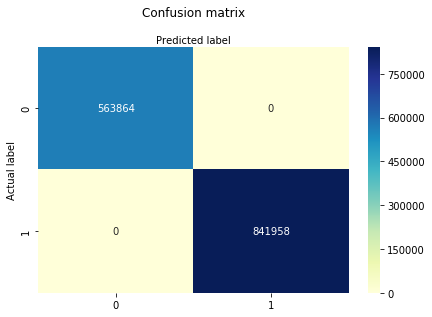

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')